# Renormalization of the 2-dimensional pseudofractal simplicial complex

In [3]:
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
from Functions import renormalize, scomplex, plotting
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
plt.rcParams["text.usetex"] = True


colors = ["#003F5C","#2F4B7C","#665191","#A05195","#D45087","#F95D6A","#FF7C43","#FFA600"]
colors_sequential = colors + colors + colors + colors 
colors = ["#02405c", "#fea600", "#a20655", "#5e96c5", "#4b3596", "#fa6ca9", "#8d6cf6"]
colors_curves = colors+ colors+ colors+ colors


Generate the pseudofractal simplcial complex

In [8]:
steps = 6
sc = scomplex.pseudofractal_d2(steps)

## Display entropic susceptibilities

In [10]:
# Define the string specifying the cross-order Laplacians to consider

laplacians_types = ["01","02","10","12","20","21"]

sparse = False
num_eigs = 500

# Compute eigenvalues of the Laplacians and their entropic susceptibilities 

taumin = -3 # C curve starts from 10**taumin
taumax = 4 # C curve ends at 10**taumax
ntau = 200 # Number of times to consider in the interval

C_curves = []
sp_dims = []

for l in laplacians_types:  
    #print(f"L_({l[0]},{l[1]})")  
    L = scomplex.XO_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = sparse)
  
    if sparse:
        D,U = scipy.sparse.linalg.eigsh(L.asfptype(),k = num_eigs, which = "SM")
        D = np.append(D,1000000*np.ones(L.shape[0]-num_eigs),axis=0)
    else:
        D,U = np.linalg.eigh(L)
        D = np.abs(D)

    entropic_susceptibility,tau_space, __ = renormalize.compute_entropic_C(D,taumin,taumax,ntau)
    spectral_dimension,tau_space = renormalize.compute_spectral_d(D,taumin,taumax,ntau)
    C_curves.append(entropic_susceptibility)
    sp_dims.append(spectral_dimension)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


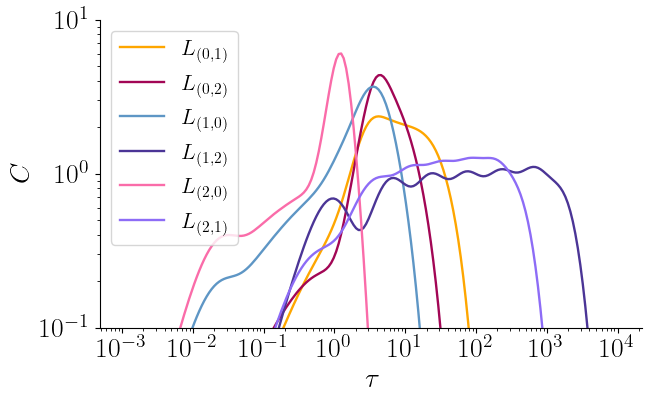

In [13]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (7,4))
for id,i in enumerate(laplacians_types):
    ax.loglog(tau_space,C_curves[id],color = colors_curves[id+1],linewidth = 1.7,alpha = 1)


ax.set_ylim([10**-1,10])

ax.legend(names,fontsize = 16)

ax.set_xlabel(r"$\tau$",fontsize = 20)
ax.set_ylabel(r"$C$",fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.despine()


## Renormalize the simplicial complex

Create a smaller simplicial complex for visualization

In [14]:
steps = 4
sc = scomplex.pseudofractal_d2(steps)

### Renormalization with the standard graph Laplacian

123
76
61
46


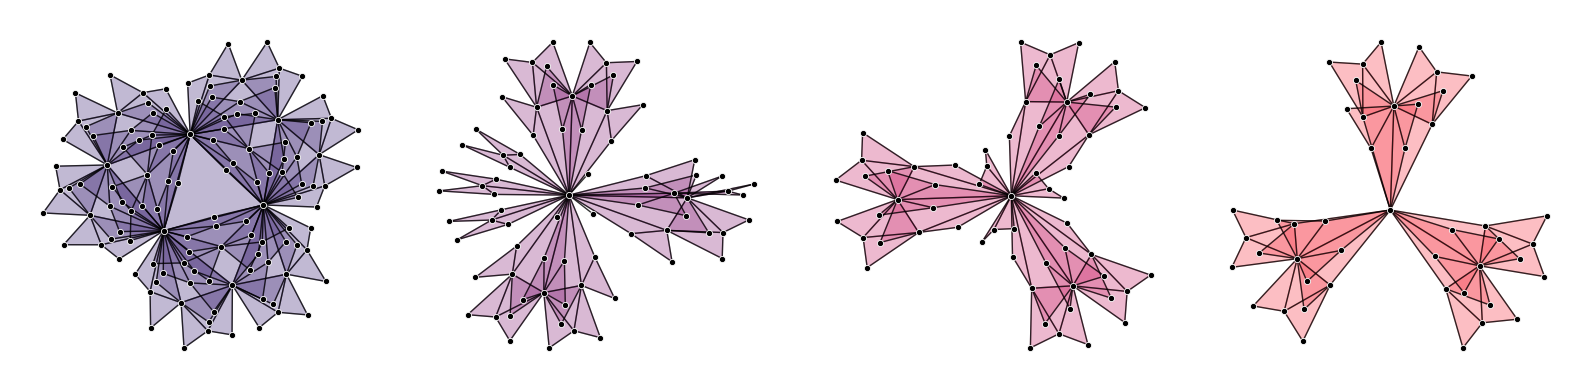

In [17]:
lmax = 4 # Number of steps
diff_order = 0 # Diffusion order
int_order = 1 # Interaction order
tau = 0.2 # Diffusion time
VERBOSE = True # Whether to print the number of nodes after each step

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, VERBOSE = VERBOSE)

# Plot sequence
f,axs = plt.subplots(1,lmax,figsize = (4*lmax,4))
i = 0
for new_sc in sequence:
    col = colors_sequential[i+2]
    plotting.plot_complex(new_sc,ax = axs[i],face_color=[col],face_alpha=0.4,node_size=20,iterations=2000)
    axs[i].collections[1].set_alpha(0.8)
    axs[i].collections[0].set_linewidth(0.6) 
    axs[i].collections[0].set_edgecolor("#FFFFFF") 
    i+=1
plt.tight_layout()


### Renormalization with the (1,2) cross-order Laplacian

123
42
15
6


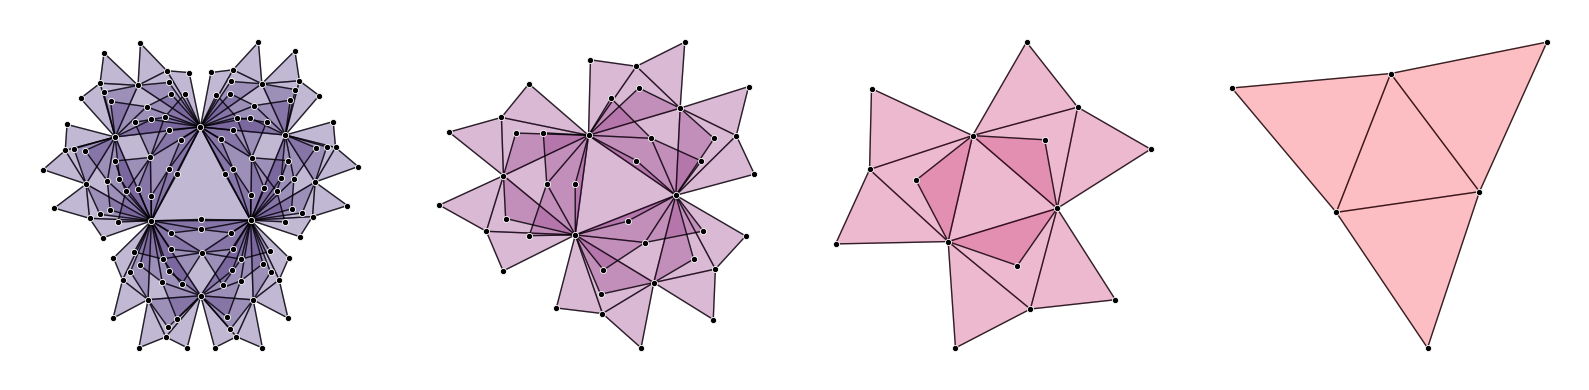

In [19]:
lmax = 4 # Number of steps
diff_order = 1 # Diffusion order
int_order = 2 # Interaction order
tau = 2.6 # Diffusion time
VERBOSE = True # Whether to print the number of nodes after each step

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, VERBOSE = VERBOSE)

# Plot sequence
f,axs = plt.subplots(1,lmax,figsize = (4*lmax,4))
i = 0
for new_sc in sequence:
    col = colors_sequential[i+2]
    plotting.plot_complex(new_sc,ax = axs[i],face_color=[col],face_alpha=0.4,node_size=20,iterations=2000)
    axs[i].collections[1].set_alpha(0.8)
    axs[i].collections[0].set_linewidth(0.6) 
    axs[i].collections[0].set_edgecolor("#FFFFFF") 
    i+=1
plt.tight_layout()
